In [ ]:
# vamos a entrenar una clasificador neuronal para predecir cancer.
# tenemos que cargar dataset cancer.csv

In [1]:
# paquetes para analisis de datos
import numpy 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [2]:
# paquetes para Keras

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Mejor esta alternativa
#import tensorflow as tf
#import matplotlib.pyplot as plt
#layers = tf.keras.layers

Using TensorFlow backend.
/Users/MAValle/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/MAValle/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/MAValle/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/MAValle/anaconda3/lib/python3.7/site-packag

In [3]:
# carga de datos

data = pd.read_csv("cancer.csv", header=0)
seed = 5
numpy.random.seed(seed)

print(data.head(2))

       id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   
1  842517         M        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33            184.6      2019.0            0.1622   
1  ...          23.41            158.8      1956.0            0.1238   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# tenemos 32 columnas sin nombre! las vamos a quitar
data.drop("Unnamed: 32",axis=1,inplace=True)
data.drop("id", axis=1, inplace=True)

In [6]:
# chequeo
# Check whether the column has been dropped
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
# seleccionamos columnas que nos interesen

prediction_var = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
X = data[prediction_var].values
Y = data.diagnosis.values

In [8]:
# Las clases (diagnosticos) son texto. Los vamos a cambiar a valor numerico utilizando
# LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [9]:
# definimos una red neuronal
# capa oculta con 10 neuronas

# Nota aqui estamos haciendo lo mismo de siempre, pero con una funcion

#def create_baseline():
    # creacion del modelo
#    model = Sequential()
#    model.add(Dense(10, input_dim=30, kernel_initializer='normal', activation='relu'))
#    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
#    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#    return model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim=30, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
# evaluacion del modelo utilizando los datos estandarizados.

history = model.fit(X, encoded_Y, batch_size=256, epochs=10, verbose=1,
                   validation_data=(X, encoded_Y))

# falta un set de datos de validacion!

Instructions for updating:
Use tf.cast instead.
Train on 569 samples, validate on 569 samples
Epoch 1/10
569/569 [==============================] - 1s 2ms/step - loss: 0.8859 - acc: 0.3743 - val_loss: 0.7058 - val_acc: 0.5606
Epoch 2/10
569/569 [==============================] - 0s 17us/step - loss: 0.7200 - acc: 0.5958 - val_loss: 0.6863 - val_acc: 0.6415
Epoch 3/10
569/569 [==============================] - 0s 16us/step - loss: 0.6666 - acc: 0.6819 - val_loss: 0.6261 - val_acc: 0.5466
Epoch 4/10
569/569 [==============================] - 0s 24us/step - loss: 0.6203 - acc: 0.5589 - val_loss: 0.5919 - val_acc: 0.6924
Epoch 5/10
569/569 [==============================] - 0s 25us/step - loss: 0.5846 - acc: 0.7469 - val_loss: 0.5646 - val_acc: 0.8594
Epoch 6/10
569/569 [==============================] - 0s 21us/step - loss: 0.5597 - acc: 0.8559 - val_loss: 0.5397 - val_acc: 0.8576
Epoch 7/10
569/569 [==============================] - 0s 19us/step - loss: 0.5345 - acc: 0.8594 - val_loss: 0

Text(0.5, 1.0, 'Accuracy Curves')

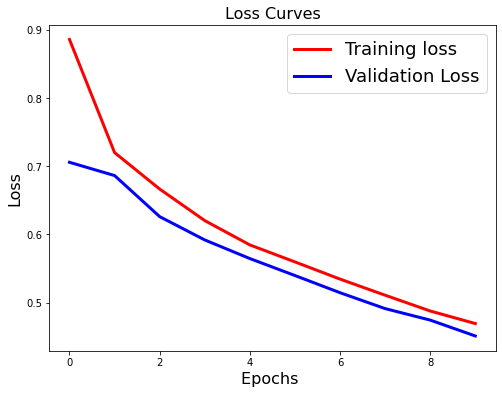

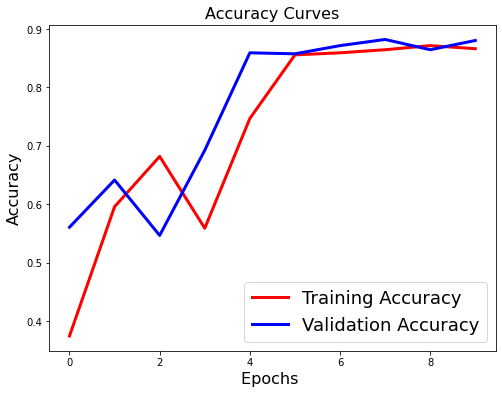

In [12]:
#Plot curva loss function
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)


#Plot accuracy
plt.figure(figsize=[8,6]) 
plt.plot(history.history['acc'],'r',linewidth=3.0) 
plt.plot(history.history['val_acc'],'b',linewidth=3.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)